# DEDS-week 7, Hoorcollege 3 - Missende waarden in continue data (TBC eerste HC2 maken, anders gaat dtypes-conversie fout)

## Libraries importeren

In [14]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

import numpy as np
import random

Misschien valt het op dat we een aantal extra packages importeren...
- Matplotlib.pyplot voor het maken van grafieken.
- Numpy voor extra wiskundige functies.
- Random voor het laten genereren van een willekeurig getal.

## Dataframe aanmaken en missende waarden invoegen

## Missende waarden invoegen (optioneel)

In [15]:
def laadDataIn(bestandsnaam, aantalTeVerwijderen):
    dataframe = pd.read_excel(bestandsnaam)
    
    for kolom in ['PRODUCTION_COST', 'MARGIN']:
        verwijderGetallenOpWillekeurigePlekken(dataframe, kolom, aantalTeVerwijderen)
    
    return dataframe

Voor de duidelijkheid: met 'def' wordt een Pythonfunctie gecreëerd die we later meerdere keren zullen aanroepen.

Misschien valt het ook op dat dit keer niet pd.read_sql(...), maar pd.read_excel(...) wordt gebruikt. Dit is gedaan, omdat er een databestand 'product_clean.xlsx' wordt gebruikt, waarin alle verwisselde waarden al zijn verwisseld (lesstof van woensdag) en ook alle datatypen al op orde zijn gemaakt.

In [16]:
def verwijderGetallenOpWillekeurigePlekken(dataframe, kolom, aantalTeVerwijderen):

    for i in range(aantalTeVerwijderen):
        dataframe.at[random.randint(0, dataframe.shape[0]), kolom] = np.nan

In [17]:
product = laadDataIn("product_clean.xlsx", 10)
product

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION
0,1,15-2-2011,1,4.00,0.33,P01CE1CG1.jpg,EN,TrailChef Water Bag,"Lightweight, collapsible bag to carry liquids ..."
1,10,15-2-2011,1,10.00,0.40,P10CE1CG1.jpg,EN,TrailChef Utensils,"Spoon, fork and knife set made of a light yet ..."
2,100,15-2-2011,17,3.00,0.50,P100OP4FA17.jpg,EN,Insect Bite Relief,The Insect Bite Relief helps the itching and s...
3,101,15-12-2019,18,305.54,NaN,P101GE5IR18.jpg,EN,Hailstorm Steel Irons,Iron is 17-4 stainless steel. Shafts are grap...
4,102,10-12-2019,18,380.95,0.51,P102GE5IR18.jpg,EN,Hailstorm Titanium Irons,Made entirely of pure titanium. The ultimate i...
...,...,...,...,...,...,...,...,...,...
110,95,15-2-2011,16,3.00,0.50,P91OP4SS16.jpg,EN,Sun Shield,"PABA free sunscreen, SPF 30, poison oak and iv..."
111,96,15-2-2011,17,16.43,0.28,P96OP4FA17.jpg,EN,Compact Relief Kit,A personal first aid kit is recommended for ev...
112,97,5-3-2013,17,25.00,0.28,P96OP4FA17.jpg,EN,Deluxe Family Relief Kit,A complete medical kit suitable for families w...
113,98,15-2-2011,17,3.00,0.50,P98OP4FA17.jpg,EN,Calamine Relief,Use the Calamine Relief for allergic skin reac...


In [18]:
print(product['PRODUCTION_COST'].isna().sum())
print(product['MARGIN'].isna().sum())

9
9


Bovenstaande code is alleen maar bedoeld om in de kolommen 'PRODUCTION_COST' en 'MARGIN' op 10 willekeurige plekken wat getallen weg te halen en dus een aantal missende waarden in te bouwen in je tabel. Dit is uiteraard precies het tegenovergestelde van wat je wil als je data schoonmaakt, maar omwille van de oefening om missende continue data weg te halen is het uitvoeren van deze coderegels noodzakelijk. Deze code mag je negeren en op het toepassen van deze techniek ga je in dit hele semester niet beoordeeld worden.

In [19]:
product.dtypes

PRODUCT_NUMBER         int64
INTRODUCTION_DATE     object
PRODUCT_TYPE_CODE      int64
PRODUCTION_COST      float64
MARGIN               float64
PRODUCT_IMAGE         object
LANGUAGE              object
PRODUCT_NAME          object
DESCRIPTION           object
dtype: object

Belangrijk om te weten: als je jezelf voorneemt om met kolommen met continue data te werken, is het ook belangrijk dat Python erkent dat in die kolommen ook daadwerkelijk continue data staat. In dit geval willen we graag missende waarden in PRODUCTION_COST en MARGIN invoeren. Even de datatypen van deze 2 kolommen controleren...

De kolommen PRODUCTION_COST en MARGIN zijn van het type 'float64', wat bijna altijd duidt op continue data. Dit is dus helemaal goed! Stel dat beide kolommen van het type 'object' waren geweest, dan had je onderstaande code moeten gebruiken om de datatypen weer op orde te krijgen.

In [20]:
product['PRODUCTION_COST'] = product['PRODUCTION_COST'].astype(float)
product['MARGIN'] = product['MARGIN'].astype(float)
product.dtypes

PRODUCT_NUMBER         int64
INTRODUCTION_DATE     object
PRODUCT_TYPE_CODE      int64
PRODUCTION_COST      float64
MARGIN               float64
PRODUCT_IMAGE         object
LANGUAGE              object
PRODUCT_NAME          object
DESCRIPTION           object
dtype: object

Bovenstaand stuk code doet nu het juiste, maar is eigenlijk overbodig. De juiste kolommen stonden immers al op datatype 'float64'.

## Missende waarden afhandelen

### Mogelijke methoden

Binnen de Data Science wordt er onderscheid gemaakt tussen 2 soorten data:
- Categorische data: dit zijn datapunten waarop alleen een telberekening uitgevoerd kan worden. Hier hebben we maandag al bij stilgestaan.
- Continue data: dit zijn getallen waarop verschillende berekeningen uitgevoerd kunnen worden (som, gemiddelde, mediaan, minimum, maximum, enzovoort).

Hoe je missende waarden gaat invullen hangt heel sterk af van de soort data die in de betreffende kolom staat. 3 mogelijkheden voor het invullen van missende continue datawaarden:
- Een bepaald standaardgetal aangeven dat gelijk staat aan 'onbekend'. Groot nadeel: bij data-aggregaties (zoals het berekenen van de som of het gemiddelde) moet je er goed aan denken dat je deze getallen eruit filtert. Gebruik deze methode als...
    - De kolom allemaal verschillende waarden bevat, die niet afgeleid kunnen worden van waarden uit andere kolommen.
    - Je op korte termijn niet geïnteresseerd bent in de analysemogelijkheden van deze kolom.
- Het gemiddelde pakken van alle getallen in dezelfde kolom die wél bekend zijn. Gebruik deze methode als je data "normaal verdeeld" is.
- De mediaan pakken van alle getallen in dezelfde kolom die wél bekend zijn. Gebruik deze methode als je data "niet normaal verdeeld" (dus erg gespreid) is.

In de onderstaande coderegels wordt in de producttabel per kolom met continue data achterhaald wat de juiste vulmethode is en wordt gedemonstreerd hoe je deze toepast in Python.

## 'Getal-onbekendmethode'

De kolom PRODUCTION_COST bestaat alleen maar uit continue data: er staan immers alleen getallen in en geen strings of datums, o.i.d. Hoeveel missende waarden heeft deze kolom? Laten we nog eens kijken...

In [21]:
product['PRODUCTION_COST'].isna().sum()

9

Er zijn dus 10 waarden die nu nog missen. Laten we met de eerste methode oefenen: de 'getal-onbekend'-methode. We besluiten namelijk ter plekke dat we niet geïnteresseerd zijn in het analyseren van productiekosten en dit is een geldig argument om deze methode te hanteren. Aangezien productiekosten altijd 0 of hoger zijn, besluiten we om onbekende kosten aan te duiden met -1.

In [22]:
product['PRODUCTION_COST'] = product['PRODUCTION_COST'].fillna(-1)
product['PRODUCTION_COST'].isna().sum()

0

Met de eerste coderegel vullen we de waarde -1 in met de .fillna(...)-methode. Met de tweede coderegel vragen we vervolgens nog een keer het aantal missende waarden op. We verwachten nu uiteraard dat deze 0 is en dat klopt ook! Operatie geslaagd dus!
Maar wacht... hoe krijg ik nu de totale productiekosten? Je zou zeggen dat dat met de onderstaande code mogelijk is

In [23]:
product['PRODUCTION_COST'].sum()

8703.39

Maar... dit getal is zeer verraderlijk! De -1's die we eraan hebben toegevoegd worden meegenomen in de berekening! We zullen dus met de .loc[]-methode, die we al heel lang kennen, moeten specificeren dat alle -1's genegeerd worden. Het daadwerkelijke totaal van alle productiekosten is dus:

In [24]:
product.loc[product['PRODUCTION_COST'] != -1, 'PRODUCTION_COST'].sum()

8712.39

Zoals eerder al gezegd is dit '2 keer moeten nadenken voordat je data aggregeert' een groot nadeel bij het gebruiken van de 'getal-onbekendmethode'.

## Gemiddelde-/mediaanafweging

In [25]:
product = laadDataIn("product_clean.xlsx", 10)
product['MARGIN'].isna().sum()

9

De PRODUCTION_COST is nu gevuld, maar de margin nog niet. Da's mooi, want dan kunnen we oefenen met het toekennen van het gemiddelde en de mediaan. Laten we eerst kijken naar het verschil tussen deze 2. Stel dat we de volgende lijst hebben:

In [26]:
leeftijden = [33, 32, 35, 38, 40, 29, 1, 12, 15]
print(leeftijden)

print("Som leeftijden: " + str(np.sum(leeftijden)))
print("Aantal leeftijden: " + str(len(leeftijden)))
print("Gemiddelde van leeftijden: " + str(np.mean(leeftijden)))

[33, 32, 35, 38, 40, 29, 1, 12, 15]
Som leeftijden: 235
Aantal leeftijden: 9
Gemiddelde van leeftijden: 26.11111111111111


Het gemiddelde wordt berekend door alle leeftijden bij elkaar op te tellen en vervolgens te delen door het aantal leeftijden. Dit klinkt als een goede methode om tot één getal te komen die de héle dataset beschrijft, maar dit heeft wel een nadeel: het wordt namelijk sterk beïnvloed door zogeheten 'outliers'. We hebben immers ook enkele kinderen (met leeftijd 1) en pubers (12 en 15) erin zitten, waardoor het uiteindelijke gemiddelde lager uitkomt (26.6) dan we op het eerste gezicht zouden denken (ergens in de 30). De waarden in de dataset die we hebben zijn dan ook erg gespreid, we zeggen in dat geval ook wel dat de data 'niet normaal verdeeld' is. Laten we nu de mediaan berekenen...

In [27]:
leeftijden.sort()
print(leeftijden[int(len(leeftijden) / 2)]) #Pakt het middelste getal uit de gesorteerde lijst
print(np.median(leeftijden))

32
32.0


Voor het berekenen van de mediaan worden allereerst alle leeftijden gesorteerd van laag naar hoog. Vervolgens wordt het middelste getal gepakt (32). In dit geval is de mediaan een veel beter middel om de hele dataset samen te vatten, aangezien we in één oogopslag konden zien dat het merendeel van de leeftijden in de 30 lag. Dit is dus beter dan de gemiddelde leeftijd van 26 die we net hadden.

Om er snel achter te komen hoe verdeeld een dataset nou eigenlijk is, kunnen we hier een boxplot van maken:

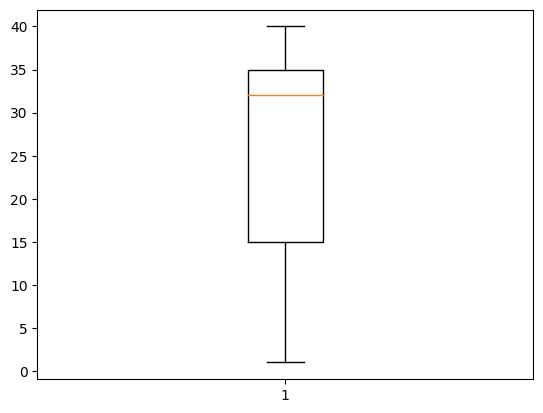

In [28]:
plt.boxplot(leeftijden)
plt.show()

Het blokje in het ongeveer-midden staat voor getallen die ongeveer rond het gemiddelde liggen, de oranje lijn geeft de net-berekende mediaan aan. De verticale strepen boven en onder dit blokje staan voor 'outliers'. In dit geval zien we dus, wat we net ook al concludeerden, dat we relatief vrij veel 'outliers' naar beneden hebben, waardoor het gemiddelde lager uitvalt dan de mediaan. Nogmaals: dit toont aan dat een dataset niet (echt) 'normaal verdeeld' is en dat het beter is om op de plek van eventuele missende waarden de mediaan te zetten (en niet het gemiddelde).

## Praktische toepassing

Laten we nu een boxplot maken voor de MARGIN-kolom:

In [29]:
product.loc[~product['MARGIN'].isna(), ['MARGIN']]

,MARGIN
0,0.33
2,0.50
3,0.43
4,0.51
5,0.43
...,...
109,0.60
110,0.50
111,0.28
113,0.50


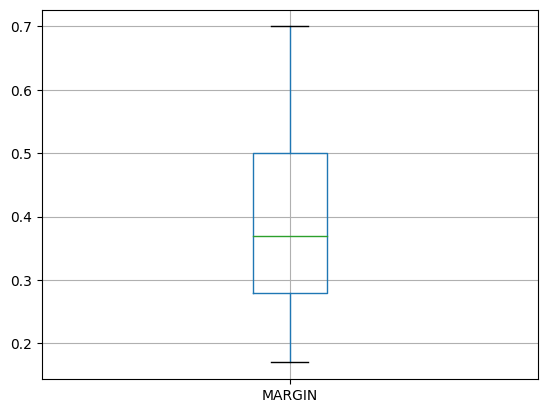

In [30]:
product.loc[~product['MARGIN'].isna(), ['MARGIN']].boxplot()
plt.show()

In [31]:
mean_margin = np.mean(product.loc[~product['MARGIN'].isna(), ['MARGIN']])[0]
median_margin = np.median(product.loc[~product['MARGIN'].isna(), ['MARGIN']])

print("Gemiddelde: " + str(mean_margin))
print("Mediaan: " + str(median_margin))

Gemiddelde: 0.3947169811320755
Mediaan: 0.37


c:\Coding\Python\Version\3.10.8\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Uit de gemaakte boxplot kunnen we concluderen dat het in dit geval heel weinig uitmaakt of we het gemiddelde of de mediaan op de missende plekken zetten, aangezien beide kengetallen niet al tever van elkaar afliggen (het scheelt ongeveer 2 a 3 cent ;-) ). We besluiten om de missende waarden te veranderen door de mediaan.

In [32]:
product['MARGIN'] = product['MARGIN'].fillna(median_margin)
product['MARGIN'].isna().sum()

0

En zo zien we dat ook het vervangen van continue data is gelukt :-) .